## Number crunching on the full Olympic dataset

### Uncomment if not installed

In [33]:
# import sys
# !{sys.executable} -m pip install rdflib pandas

In [34]:
from rdflib import Graph
import pandas as pd

### Import full ttl files

In [4]:
source = "ttl/full"

In [5]:
g = Graph()
g.parse(source + "/Athletes.ttl", format="turtle")
print(len(g))

923757


In [6]:
g.parse("ttl/NOC_Regions.ttl", format="turtle")
print(len(g))

923987


In [7]:
g.parse(source + "/Games.ttl", format="turtle")
print(len(g))

924278


In [8]:
g.parse(source + "/Events.ttl", format="turtle")
print(len(g))

926453


In [9]:
g.parse("ttl/Medals.ttl", format="turtle")
print(len(g))

926456


In [10]:
g.parse(source + "/Instance.ttl", format="turtle")
print(len(g))

1748889


### What are the chances of winning a medal as an Austrian?

#### Summer Olympics

In [38]:
result = g.query("""

    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>

    SELECT (COUNT (?medal) AS ?numMedals)
    WHERE {
        ?instance ex:athlete ?athlete;
                    ex:medal ?medal;
                    ex:games ?games .
    
        ?games ex:season ?season .
        ?season rdfs:label "Summer"@en .
    }

""")

for row in result:
    res = "%s" % row

numOfMedalsSummerTotal = int(res)
print("Summer medals total: ", numOfMedalsSummerTotal)

result = g.query("""

    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>
    PREFIX noc: <http://example.org/resource/olympics/NOC/>

    SELECT (COUNT (?medal) AS ?numMedals)
    WHERE {
        ?instance ex:athlete ?athlete;
                    ex:medal ?medal;
                    ex:games ?games .
    
        ?games ex:season ?season .
        ?athlete ex:noc ?noc .
        ?noc dbo:country "Austria" .
        ?season rdfs:label "Summer"@en .
    }

""")

for row in result:
    res = "%s" % row

numOfMedalsSummerAut = int(res)
print("Austrian Summer medals total: ", numOfMedalsSummerAut)
chanceSummer = round(100/numOfMedalsSummerTotal*numOfMedalsSummerAut,2)
print("Chance: ", chanceSummer, "%")

Summer medals total:  33840
Austrian Summer medals total:  137
Chance:  0.4 %


# Ouch!
#### Winter Olympics

In [39]:
result = g.query("""

    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>

    SELECT (COUNT (?medal) AS ?numMedals)
    WHERE {
        ?instance ex:athlete ?athlete;
                    ex:medal ?medal;
                    ex:games ?games .
    
        ?games ex:season ?season .
        ?season rdfs:label "Winter"@en .
    }

""")

for row in result:
    res = "%s" % row

numOfMedalsWinterTotal = int(res)
print("Winter medals total: ", numOfMedalsWinterTotal)

result = g.query("""

    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>
    PREFIX noc: <http://example.org/resource/olympics/NOC/>

    SELECT (COUNT (?medal) AS ?numMedals)
    WHERE {
        ?instance ex:athlete ?athlete;
                    ex:medal ?medal;
                    ex:games ?games .
    
        ?games ex:season ?season .
        ?athlete ex:noc ?noc .
        ?noc dbo:country "Austria" .
        ?season rdfs:label "Winter"@en .
    }

""")

for row in result:
    res = "%s" % row

numOfMedalsWinterAut = int(res)
print("Austrian Winter medals total: ", numOfMedalsWinterAut)
chanceWinter = round(100/numOfMedalsWinterTotal*numOfMedalsWinterAut,2)
print("Chance: ", chanceWinter, "%")

Winter medals total:  5668
Austrian Winter medals total:  216
Chance:  3.81 %


## Let's stick to Winter then ;-) 
### How about Alpine Skiing?

In [41]:
result = g.query("""

    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>
    PREFIX noc: <http://example.org/resource/olympics/NOC/>

    SELECT (COUNT (?medal) AS ?numMedals)
    WHERE {
        ?instance ex:athlete ?athlete;
                  ex:medal ?medal;
                  ex:event ?event .
    
        ?event rdfs:subClassOf <http://example.org/resource/olympics/sport/AlpineSkiing> .

    }


""")

for row in result:
    res = "%s" % row

numOfMedalsAlpineSkiingTotal = int(res)
print("Alpine Skiing medals total: ", numOfMedalsAlpineSkiingTotal)

result = g.query("""

    PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX ex: <http://example.org/ontology/olympics/>
    PREFIX noc: <http://example.org/resource/olympics/NOC/>

    SELECT (COUNT (?medal) AS ?numMedals)
    WHERE {
        ?instance ex:athlete ?athlete;
                  ex:medal ?medal;
                  ex:event ?event .
    
        ?event rdfs:subClassOf <http://example.org/resource/olympics/sport/AlpineSkiing> .
    
        ?athlete ex:noc ?noc .
        ?noc dbo:country "Austria" .

    }

""")

for row in result:
    res = "%s" % row

numOfMedalsAlpineSkiingAut = int(res)
print("Austrian Alpine Skiing medals total: ", numOfMedalsAlpineSkiingAut)
chanceSkiing = round(100/numOfMedalsAlpineSkiingTotal*numOfMedalsAlpineSkiingAut,2)
print("Chance: ", chanceSkiing, "%")

Alpine Skiing medals total:  428
Austrian Alpine Skiing medals total:  73
Chance:  17.06 %


### No surprise really, we're a skiing nation :-)

Let's see this on a graph:

Text(0.5, 0.98, 'Categorical Plotting')

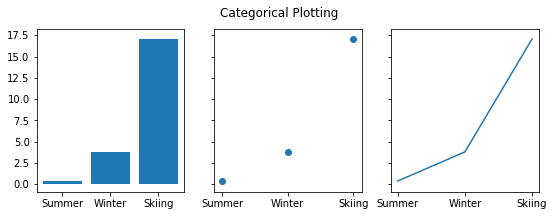

In [44]:
import matplotlib.pyplot as plt

data = {'Summer': chanceSummer, 'Winter': chanceWinter, 'Skiing': chanceSkiing}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')